In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Getting the training and test data

In [2]:
train_df = pd.read_csv("/home/pakru/Documents/kaggle/titanic/data/train.csv")
test_df = pd.read_csv("/home/pakru/Documents/kaggle/titanic/data/test.csv")

Features are:

- PassengerId: nothing that i can learn from this (this I need for the sake of submitting the answer)
- Survived:
- Pclass: Class in which the passenger travelled
- Name: Name of the person traveling (Name has titles in the front of it form which i can get more data or i can engineer a feature using this)
- Sex: Male or Female
- Age: Age of the ticket holder
- SibSp: Number of siblings/ spouses on the ship
- Parch: number of parents/ children on the ship
- Ticket: (Ticket number) nothing i can learn from this
- Fare: amount payed for the ticket
- Cabin: Cabin number
- Embarked: Port of embarkation        

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


checking null values

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from this we can see we are missing values in the case of age and in the case of cabin number (cabin number is not needed so I think i can just leave that)

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Finding the portion of people that survived in the wreckage

In [7]:
print(f"Total number of people on the ship: {train_df.count()}\n")
print(f"Survived: \n{train_df.Survived.value_counts()}")

Total number of people on the ship: PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Survived: 
0    549
1    342
Name: Survived, dtype: int64


much larger proportion of people died than survived

<AxesSubplot:ylabel='Survived'>

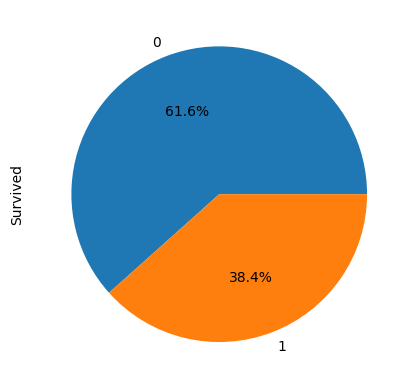

In [8]:
train_df["Survived"].value_counts().plot.pie(autopct="%1.1f%%")

### Looking at the Pclass col
1: first class cabins
2: second class cabins
3: third class cabins

In [9]:
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

There are much more people in the 3rd class but something unique that i did not notice when i was looking at the dataset the first time is that there are more people in first class than there are in second class

<AxesSubplot:ylabel='Pclass'>

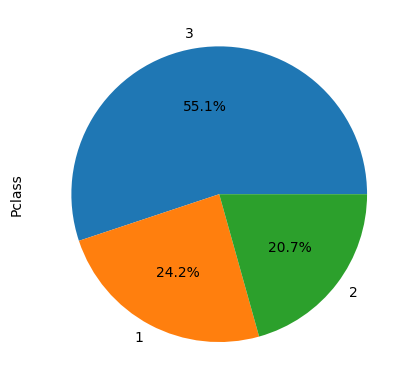

In [10]:
train_df["Pclass"].value_counts().plot.pie(autopct="%1.1f%%")

Looking at how Pclass affected survial

In [11]:
train_df.groupby(["Pclass", "Survived"])["Survived"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

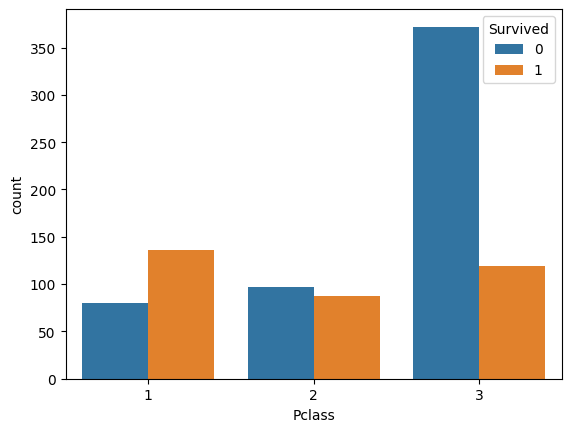

In [12]:
sns.countplot(data=train_df, x="Pclass", hue="Survived")

In [13]:
train_df.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### Sex

In [14]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train_df.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

from this we can see that females are much lower in number they survived more about 74% of females survived while only 18% of females survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

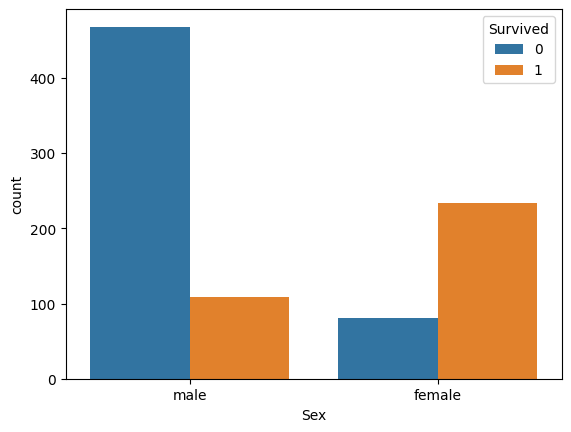

In [16]:
sns.countplot(data=train_df, x="Sex", hue="Survived")

Looking at the interaction between sex and class 

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Pclass, dtype: int64

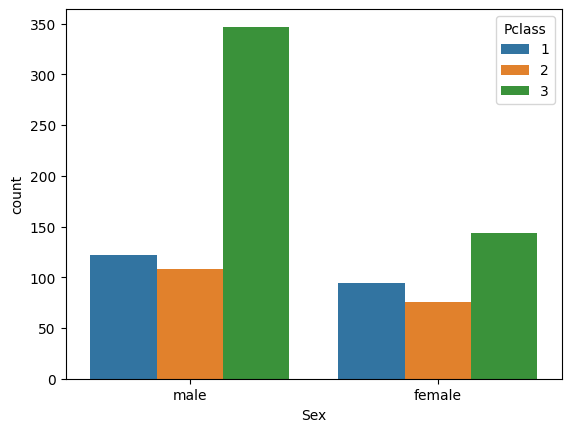

In [17]:
sns.countplot(data=train_df, x="Sex", hue="Pclass")
train_df.groupby(["Pclass", "Sex"])["Pclass"].count()

in each class even in the lower classes more females have survived

Crosstab visualization:
Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891


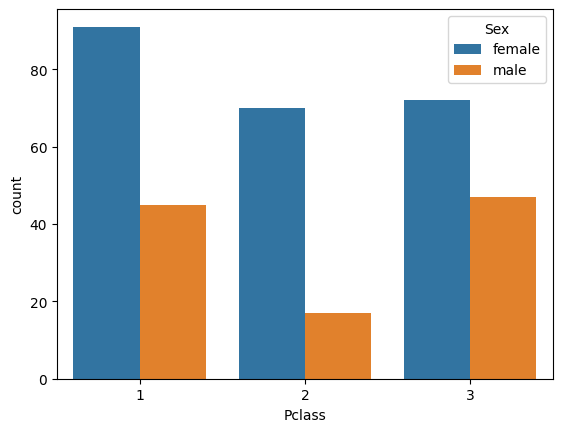

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

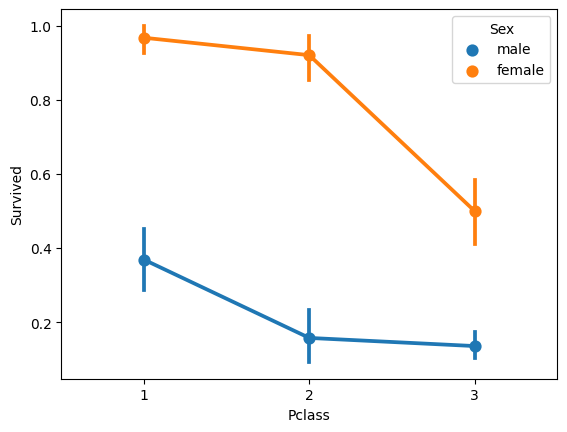

In [18]:
# Looking at the comparison b/w the men and women that survived the crash for each class of ticket
print(f"Crosstab visualization:")
print(pd.crosstab([train_df["Pclass"], train_df["Sex"]], train_df["Survived"], margins=True)) # this is a really good way of exploring data that i can really use.

# the visualization of the above metric
sns.countplot(data=train_df[train_df["Survived"]==1], x="Pclass", hue="Sex")
plt.show()

# this looks like a better way to visulize the above metric though
# this is when i want to look at the percentage of what survied in a class depending on Pclass
sns.pointplot(data=train_df, x="Pclass", y="Survived", hue="Sex")